In [1]:
%load_ext autoreload
%autoreload 2

In [32]:
import sys
sys.path.append('../src')
import xgboost as xgb
import pandas as pd
from features.UserJoin import UserJoin
from features.UserJoin import submit, diff
import config as C
import matplotlib.pyplot as plt

In [3]:
# data
ds = UserJoin()
print(ds.train2.columns)
ds.train2.head(1)

/opt/conda/envs/miner/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/envs/miner/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[10:30:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0
35


,id,label
0,179406029,0
1,179406030,0
2,179406094,0
3,179406097,0
4,179406099,0
...,...,...
15374,2849971818,0
15375,2850017469,0
15376,2850017472,0
15377,2851323065,0


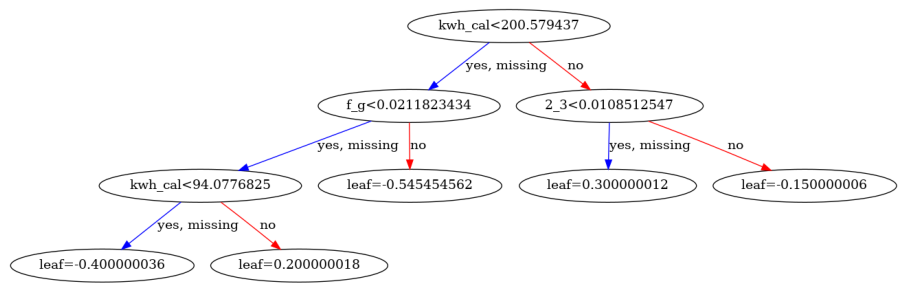

In [31]:
df = ds.train2
features = [
    'kwh_cal',
    # 'kwh_pap_r2',
    # 'kwh_pap_r3',
    # 'kwh_pap_r4',
    'pr2',
    'pr3',
    'pr4',
    '2_3',
    '2_4',
    '3_4',
    'daycv',
    # 'pq_f',
    # 'pq_g',
    # 'pq_p',
    # 'pq_z',
    'pp',
    'pf',
    'pg',
    'p_f',
    'p_g',
    'f_g',
    'monthcv'
]
x = df.loc[df.label != 'test', features]
x_val = df.loc[df.label == 'test', features]
y = df.loc[df.label != 'test', 'label']

model = xgb.XGBClassifier()
model.fit(x, y)
y_pred = model.predict(x)
print((y_pred != y).sum())
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(model, ax=ax)


y_val = model.predict(x_val).astype(int)
submit(x_val.index[y_val == 1].values, 'submit_3_7_1.csv')

In [33]:
diff('submit_3_5_1.csv', 'submit_3_7_1.csv')

in s1 not s2 5
in s2 not s1 4
inner 31


In [14]:
def check_f(s, df=ds.train2):
    def norm_arr(s, n=2):
        return s[((s < (s.mean() + n*s.std())) & (s > (s.mean() - n*s.std())))]
    norm_arr(df[s]).hist(bins=60, alpha=.4)

    s2 = df[df.index.isin(C.minerids)][s]
    s2.hist(bins=60)
    print(s2.min(), s2.max())
    plt.axvline(x=s2.min(), c='r')
    plt.axvline(x=s2.max(), c='r')
    plt.title(s)
    plt.show()

1537.9545454545455 3313.181818181818


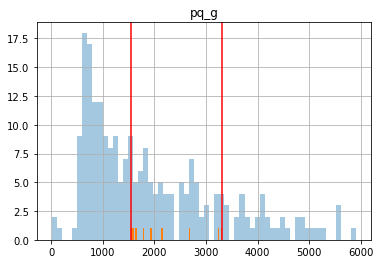

In [15]:
check_f('pq_g')

0.0013091884038677034 0.01380131234107334


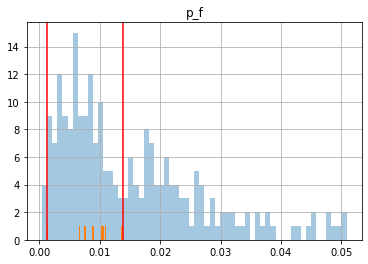

In [16]:
check_f('p_f')